<a href="https://colab.research.google.com/github/mwithgod3952/jh_Minor_Projects/blob/main/%EC%B1%97%EB%B4%87_%EB%AA%A8%EB%8D%B8_%ED%95%99%EC%8A%B5_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CRF layer 사용을 위한 텐서플로우 버전 조정

In [2]:
!pip install tensorflow==1.14.0
!pip install keras==2.2.4
!pip install tensorflow-gpu==1.14.0
!pip install git+https://www.github.com/keras-team/keras-contrib.git

     |████████████████████████████████| 109.3MB 38kB/s 
     |████████████████████████████████| 491kB 55.1MB/s 
     |████████████████████████████████| 3.2MB 49.9MB/s 
     |████████████████████████████████| 51kB 6.1MB/s 
  Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tensorflow-estimator-2.4.0
  Found existing installation: tensorboard 2.4.1
    Uninstalling tensorboard-2.4.1:
      Successfully uninstalled tensorboard-2.4.1
  Found existing installation: tensorflow 2.4.1
    Uninstalling tensorflow-2.4.1:
      Successfully uninstalled tensorflow-2.4.1
     |████████████████████████████████| 317kB 19.1MB/s 
  Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3
     |████████████████████████████████| 377.1MB 42kB/s 
  Cloning https://www.github.com/keras-team/keras-contrib.git to /tmp/pip-req-build-7mo9sryq
  Running command git clone -q 

# 사전 추가가 용이한 금융 형태소 분석기 eKoNLPy

In [3]:
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab
!bash install_mecab-ko_on_colab190912.sh

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 91, done.
remote: Counting objects: 100% (91/91), done.
remote: Compressing objects: 100% (85/85), done.
remote: Total 91 (delta 43), reused 22 (delta 6), pack-reused 0
Unpacking objects: 100% (91/91), done.
/content/Mecab-ko-for-Google-Colab
Installing konlpy.....
     |████████████████████████████████| 19.4MB 160kB/s 
     |████████████████████████████████| 92kB 12.4MB/s 
     |████████████████████████████████| 460kB 53.4MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2021-04-16 09:08:34--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::22c2:513, 2406:da00:ff00::22cd:e0db, ...
Con

In [4]:
!git clone https://github.com/entelecheia/eKoNLPy.git

Cloning into 'eKoNLPy'...
remote: Enumerating objects: 3590, done.
remote: Total 3590 (delta 0), reused 0 (delta 0), pack-reused 3590
Receiving objects: 100% (3590/3590), 73.30 MiB | 28.20 MiB/s, done.
Resolving deltas: 100% (2618/2618), done.


In [5]:
%cd eKoNLPy/

/content/Mecab-ko-for-Google-Colab/eKoNLPy


In [6]:
!python setup.py install

running install
running bdist_egg
running egg_info
creating eKoNLPy.egg-info
writing eKoNLPy.egg-info/PKG-INFO
writing dependency_links to eKoNLPy.egg-info/dependency_links.txt
writing requirements to eKoNLPy.egg-info/requires.txt
writing top-level names to eKoNLPy.egg-info/top_level.txt
writing manifest file 'eKoNLPy.egg-info/SOURCES.txt'
writing manifest file 'eKoNLPy.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build
creating build/lib
creating build/lib/ekonlpy
copying ekonlpy/utils.py -> build/lib/ekonlpy
copying ekonlpy/__init__.py -> build/lib/ekonlpy
copying ekonlpy/dictionary.py -> build/lib/ekonlpy
creating build/lib/ekonlpy/topic
copying ekonlpy/topic/__init__.py -> build/lib/ekonlpy/topic
copying ekonlpy/topic/mptk.py -> build/lib/ekonlpy/topic
creating build/lib/ekonlpy/data
copying ekonlpy/data/__init__.py -> build/lib/ekonlpy/data
copying ekonlpy/data/tagset.py -> build/lib/ekonlpy/data
creati

# 규칙 정의

의도는 총 4가지를 가진다.

In [ ]:
# analysis
# 사업 개요 알려줘 / 분석해줘 / 요약해줘

# price
# 고가 알려줘 / 종가 알려줘/ 현재가 알려줘

# similarity
# 유사 종목 알려줘 / 비슷한 종목 알려줘 / 다른 종목이랑 유사도 알려줘

# keword
# 키워드 검색해줘 / 키워드 분석해줘줘

개체명 규칙에는 여러가지가 있는데 아래는 한국해양대학교의 개체명 인식 데이터의 레이블링이다.

In [ ]:
# 참고 규칙 :

'''
총 8개의 태그가 있음
PER: 사람이름
LOC: 지명
ORG: 기관명
POH: 기타
DAT: 날짜
TIM: 시간
DUR: 기간
MNY: 통화
PNT: 비율
NOH: 기타 수량표현
개체의 범주
개체이름: 사람이름(PER), 지명(LOC), 기관명(ORG), 기타(POH)
시간표현: 날짜(DAT), 시간(TIM), 기간 (DUR)
수량표현: 통화(MNY), 비율(PNT), 기타 수량표현(NOH)
'''

'\n총 8개의 태그가 있음\nPER: 사람이름\nLOC: 지명\nORG: 기관명\nPOH: 기타\nDAT: 날짜\nTIM: 시간\nDUR: 기간\nMNY: 통화\nPNT: 비율\nNOH: 기타 수량표현\n개체의 범주\n개체이름: 사람이름(PER), 지명(LOC), 기관명(ORG), 기타(POH)\n시간표현: 날짜(DAT), 시간(TIM), 기간 (DUR)\n수량표현: 통화(MNY), 비율(PNT), 기타 수량표현(NOH)\n'

이 챗봇은 다음과 같은 규칙을 가진다.

In [ ]:
# 규칙을 정의한다.
# 모델에서 특별히 캐치해야 할 개체들을 지정해야 하는데 이 경우 키워드와 종목 이름만 개체명으로 인식한다.

# 키워드 -> KEYWORD
# 종목 이름 -> STOCK
# 나머지 -> O

# 가격 불러올 패키지 설치

In [7]:
!pip install -U finance-datareader

In [8]:
import pandas as pd
import FinanceDataReader as fdr

In [9]:
df_krx = fdr.StockListing('KRX')

In [10]:
df_krx

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,특수 목적용 기계 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,"박종익, 김세완 (각자 대표이사)",http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,"이현우, 박대현",http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도
...,...,...,...,...,...,...,...,...,...,...
7004,000547,KOSPI,흥국화재2우B,NaN,NaN,NaT,NaN,NaN,NaN,NaN
7005,000545,KOSPI,흥국화재우,NaN,NaN,NaT,NaN,NaN,NaN,NaN
7006,003280,KOSPI,흥아해운,해상 운송업,외항화물운송업(케미컬탱커),1976-06-29,12월,이환구,http://www.heung-a.com,서울특별시
7007,037440,KOSDAQ,희림,"건축기술, 엔지니어링 및 관련 기술 서비스업",설계 및 감리용역,2000-02-03,12월,"정영균, 이목운, 허철호 (각자대표)",http://www.heerim.com,서울특별시


In [11]:
stock_symbol_dict = dict(zip(df_krx.Name, df_krx.Symbol))

In [12]:
for i, (symbol, code) in enumerate(stock_symbol_dict.items()):
  if i==5:
    break
  print(symbol, code)

3S 060310
AJ네트웍스 095570
AK홀딩스 006840
APS홀딩스 054620
AP시스템 265520


In [13]:
df = fdr.DataReader('005930', '2020')

In [14]:
df.tail(5)

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2021-04-12,84100,84100,83100,83200,12915282,-0.004785
2021-04-13,83000,84500,82800,84000,15238206,0.009615
2021-04-14,84000,84300,83400,84000,13794652,0.000000
2021-04-15,83700,84500,83400,84100,16377412,0.001190
2021-04-16,84700,84700,83600,83900,15342420,-0.002378


In [15]:
# 고가
df.tail(1)['High'].values[0]

84700

In [16]:
df.tail(1)['Low'].values[0]

83600

In [17]:
df.tail(1)['Close'].values[0]

83900

#종목 이름 얻기(from 공시 데이터)

In [18]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1nIUZxASrbIa0Z2xzGVgX1dqjtnFCoKNT' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1nIUZxASrbIa0Z2xzGVgX1dqjtnFCoKNT" -O dart.csv && rm -rf /tmp/cookies.txt

--2021-04-16 09:16:11--  https://docs.google.com/uc?export=download&confirm=rcTB&id=1nIUZxASrbIa0Z2xzGVgX1dqjtnFCoKNT
Resolving docs.google.com (docs.google.com)... 142.250.73.238, 2607:f8b0:4004:82a::200e
Connecting to docs.google.com (docs.google.com)|142.250.73.238|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-04-5s-docs.googleusercontent.com/docs/securesc/lrsns5utfsmn0746nraflru3nkfilepv/kr0kgge2dsm1p3eqcje7k5spfjaohts2/1618564500000/17609157229046208934/17248570217144048508Z/1nIUZxASrbIa0Z2xzGVgX1dqjtnFCoKNT?e=download [following]
--2021-04-16 09:16:11--  https://doc-04-5s-docs.googleusercontent.com/docs/securesc/lrsns5utfsmn0746nraflru3nkfilepv/kr0kgge2dsm1p3eqcje7k5spfjaohts2/1618564500000/17609157229046208934/17248570217144048508Z/1nIUZxASrbIa0Z2xzGVgX1dqjtnFCoKNT?e=download
Resolving doc-04-5s-docs.googleusercontent.com (doc-04-5s-docs.googleusercontent.com)... 142.250.65.65, 2607:f8b0:4004:832::2001
Connecting to doc-04

In [19]:
df = pd.read_csv('dart.csv')

In [20]:
len(df)

2589

In [21]:
df.sample(10)

,code,market,name,business
1673,115160,KOSDAQ,휴맥스,II. 사업의 내용\n1. 사업의 개요\n당사의 주요 사업은 게이트웨이 사업과 자동...
187,003090,KOSPI,대웅,"II. 사업의 내용\n※ 당사는 지주회사로서, 주요 자회사인 대웅제약, 대웅바이오 ..."
304,005420,KOSPI,코스모화학,"II. 사업의 내용\n당사는 수익을 창출하는 재화와 용역의 성격, 이익 창출단위, ..."
1257,066980,KOSDAQ,브레인콘텐츠,II. 사업의 내용\n1. 업계의 현황\n(1) 콘텐츠 사업부문\n1) 콘텐츠 시장...
272,004835,KOSPI,덕성우,NaN
2436,336370,KOSPI,두산솔루스,II. 사업의 내용\n1. 사업의 개요\n가. 업계의 현황\n(1) 산업의 특성\n...
889,037270,KOSPI,YG PLUS,II. 사업의 내용\n1. 사업의 개요\n당사의 주요사업은 MD제조 및 유통판매업과...
1786,138930,KOSPI,BNK금융지주,II. 사업의 내용\n1.\n사업의 개요\n가. 업계의 현황\n(1) 국내외 경제\...
1677,115440,KOSDAQ,우리넷,II. 사업의 내용\n1. 사업의 개요\n당사의 사업 분야는 크게 전송사업(POTN...
128,002020,KOSPI,코오롱,II. 사업의 내용\n1. 사업부문별 사업의 개요\n가.\n사업부문별 사업의 개요\...


In [22]:
stock_list = df.name.to_list()

In [23]:
print(stock_list)

['동화약품', 'KR모터스', '경방', '메리츠화재', '삼양홀딩스', '삼양홀딩스우', '하이트진로', '하이트진로2우B', '유한양행', '유한양행우', 'CJ대한통운', '하이트진로홀딩스', '하이트진로홀딩스우', '두산', '두산우', '두산2우B', '성창기업지주', '대림산업', '대림산업우', '유유제약', '유유제약1우', '유유제약2우B', '일동홀딩스', '한국테크놀로지그룹', '삼천당제약', '기아차', '대유플러스', '노루홀딩스', '노루홀딩스우', '한화손해보험', '삼화페인트', '롯데손해보험', '대원강업', '중앙에너비스', '조선내화', '대동공업', '가온전선', '삼일제약', '흥국화재', '흥국화재우', '흥국화재2우B', 'CS홀딩스', '동아쏘시오홀딩스', '천일고속', 'SK하이닉스', '영풍', 'LS네트웍스', '유수홀딩스', '현대건설', '현대건설우', '이화산업', '삼성화재', '삼성화재우', '화천기공', '강남제비스코', '한화', '한화우', '한화3우B', '보해양조', '유니온', '전방', '한국주철관', 'DB하이텍', 'DB하이텍1우', '신라섬유', '페이퍼코리아', 'CJ', 'CJ우', 'CJ4우(전환)', 'JW중외제약', 'JW중외제약우', 'JW중외제약2우B', '대한방직', '만호제강', 'LG상사', '대한제분', '국보', '유진투자증권', '금호전기', '동국제강', 'GS글로벌', '남광토건', '부국증권', '부국증권우', '상상인증권', '백광산업', '삼성제약', 'SG충방', 'KG케미칼', '태원물산', '세아베스틸', '대한전선', '현대해상', 'BYC', 'BYC우', '삼부토건', '현대차증권', 'SK증권', 'SK증권우', '동양', '동양우', '동양2우B', '동양3우B', 'DI동일', '안국약품', '조비', '제일연마', '금양', '케이비아이동국실업', '종근당홀딩스', '대상', '대상우', '신영증권', '신영증권우', 'SK네트웍스',

# 학습 데이터 만들기

In [24]:
import urllib.request
import numpy as np
import random
from sklearn.utils import shuffle

In [25]:
from ekonlpy.tag import Mecab
mecab = Mecab()

##형태소 분석기 사전 추가 + 테스트

In [26]:
# 종목들 사전에 추가
for stock_name in stock_list:
  mecab.add_dictionary(stock_name, 'NNG')

사전 추가를 하더라도 동작하지 않는 일부 종목들이 존재한다. 가령, 다음과 같은 종목들이 있다.  
이에 대해서는 후에 BIO 태깅을 할 때 처리한다.

In [27]:
mecab.add_dictionary('소마젠(Reg.S)', 'NNG')
mecab.add_dictionary('SK바이오팜', 'NNG')

In [28]:
mecab.pos('소마젠(Reg.S) 시가 알려줘')

[('소마', 'NNG'),
 ('젠', 'NNG'),
 ('(', 'SSO'),
 ('Reg', 'SL'),
 ('.', 'SY'),
 ('S', 'SL'),
 (')', 'SSC'),
 ('시가', 'NNG'),
 ('알려줘', 'VV')]

In [29]:
mecab.pos('SK바이오팜 유사도가 높은 종목 알려줘')

[('SK', 'NNP'),
 ('바이오팜', 'NNG'),
 ('유사', 'NNG'),
 ('도', 'NNG'),
 ('가', 'JKS'),
 ('높', 'VA'),
 ('은', 'ETM'),
 ('종목', 'NNG'),
 ('알려줘', 'VV')]

앞으로 추가할 인텐트를 고려하여 사전 추가

In [30]:
mecab.add_dictionary('유사도', 'NNG')
mecab.add_dictionary('저가', 'NNG')
mecab.add_dictionary('테마주', 'NNG')
mecab.add_dictionary('관련주', 'NNG')
mecab.add_dictionary('관계주', 'NNG')
mecab.add_dictionary('연관주', 'NNG')

In [31]:
mecab.pos('삼성전자 시가 알려줘')

[('삼성전자', 'NNG'), ('시가', 'NNG'), ('알려줘', 'VV')]

In [32]:
mecab.pos('삼성전자 시초가 알려줘')

[('삼성전자', 'NNG'), ('시초가', 'NNG'), ('알려줘', 'VV')]

In [33]:
mecab.pos('삼성전자 종가 알려줘')

[('삼성전자', 'NNG'), ('종가', 'NNG'), ('알려줘', 'VV')]

In [34]:
mecab.pos('삼성전자 고가 알려줘')

[('삼성전자', 'NNG'), ('고가', 'NNG'), ('알려줘', 'VV')]

In [35]:
mecab.pos('삼성전자 저가 알려줘')

[('삼성전자', 'NNG'), ('저가', 'NNG'), ('알려줘', 'VV')]

In [36]:
mecab.pos('삼성전자 사업 개요 알려줘')

[('삼성전자', 'NNG'), ('사업', 'NNG'), ('개요', 'NNG'), ('알려줘', 'VV')]

In [37]:
mecab.pos('삼성전자 분석해주라')

[('삼성전자', 'NNG'), ('분석', 'NNG'), ('해', 'XSV'), ('주', 'VX'), ('라', 'EC')]

In [38]:
mecab.pos('삼성전자 유사도가 높은 종목 알려줘')

[('삼성전자', 'NNG'),
 ('유사도', 'NNG'),
 ('가', 'JKS'),
 ('높', 'VA'),
 ('은', 'ETM'),
 ('종목', 'NNG'),
 ('알려줘', 'VV')]

In [39]:
mecab.pos('삼성전자 상관도가 높은 종목 알려줘')

[('삼성전자', 'NNG'),
 ('상관도', 'NNG'),
 ('가', 'JKS'),
 ('높', 'VA'),
 ('은', 'ETM'),
 ('종목', 'NNG'),
 ('알려줘', 'VV')]

In [40]:
mecab.pos('미세먼지 테마주 알려줘')

[('미세먼지', 'NNP'), ('테마주', 'NNG'), ('알려줘', 'VV')]

In [41]:
mecab.pos('미세먼지 관련주 알려줘')

[('미세먼지', 'NNP'), ('관련주', 'NNG'), ('알려줘', 'VV')]

In [42]:
mecab.pos('키워드 반도체')

[('키워드', 'NNP'), ('반도체', 'NNG')]

In [43]:
mecab.pos('SK하이닉스랑 비슷한 주식은 뭘까')

[('SK하이닉스', 'NNP'),
 ('랑', 'JC'),
 ('비슷', 'NNG'),
 ('한', 'XSA'),
 ('주식', 'NNG'),
 ('은', 'JX'),
 ('뭘까', 'NP')]

In [44]:
mecab.pos('반도체 관계주 알려줘')

[('반도체', 'NNG'), ('관계주', 'NNG'), ('알려줘', 'VV')]

##유사 종목 학습 데이터 만들기

In [45]:
# 하고 라는 표현 추가하여 데이터 증강 필요
names = stock_list
def question_generator(names):
    question = []
    for name in names:
        s1 = name+'의 유사 종목 알려줘'
        s2 = name+'의 유사 종목 알고싶어'
        s3 = name+'의 유사 종목 알려줄래?'
        s4 = name+'의 유사 종목은?'
        s5 = name+' 유사 종목 검색'
        s5 = name+'랑 유사한 주식 알고싶어'
        s6 = name+'와 유사한 주식이 모야'
        s7 = name+' 유사 종목 검색해줘'
        s8 = name+'의 비슷한 종목 알려줘'
        s9 = name+'와 비슷 종목 검색해줘'
        s10 = name+'와 비슷한 주식을 알려줘'
        s11 = name+'과 비슷한 종목을 알고싶어'
        s12 = '유사 종목 검색 '+name
        s13 = '유사 종목 '+name
        s14 = '비슷한 종목 검색 '+name
        s15 = '유사 종목 분석 '+name
        s16 = name+'와 비슷한 종목 분석'
        s17 = name+'과 유사 종목 분석'
        s18 = name+'랑 유사한 종목이 궁금해'
        s19 = name+'이랑 비슷한 주식을 알려줘'
        question = question+[s1, s2, s3, s4, s5, s6, s7, s8, s9, s10, s11, s12, s13, s14, s15, s16, s17, s18, s19]
    return question
question = question_generator(names)

In [46]:
similarity = question

In [47]:
len(similarity)

49191

In [48]:
random.sample(similarity, 10)

['유사 종목 검색 에스맥',
 '알루코와 비슷 종목 검색해줘',
 '휴켐스의 유사 종목 알려줘',
 '피제이전자과 비슷한 종목을 알고싶어',
 '비슷한 종목 검색 수산중공업',
 '유투바이오이랑 비슷한 주식을 알려줘',
 '미래생명자원의 유사 종목은?',
 '셀트리온제약와 유사한 주식이 모야',
 '에프엔씨엔터와 유사한 주식이 모야',
 '유니테크노의 유사 종목은?']

In [49]:
test_result = question_generator(['삼성전자'])

In [50]:
test_result

['삼성전자의 유사 종목 알려줘',
 '삼성전자의 유사 종목 알고싶어',
 '삼성전자의 유사 종목 알려줄래?',
 '삼성전자의 유사 종목은?',
 '삼성전자랑 유사한 주식 알고싶어',
 '삼성전자와 유사한 주식이 모야',
 '삼성전자 유사 종목 검색해줘',
 '삼성전자의 비슷한 종목 알려줘',
 '삼성전자와 비슷 종목 검색해줘',
 '삼성전자와 비슷한 주식을 알려줘',
 '삼성전자과 비슷한 종목을 알고싶어',
 '유사 종목 검색 삼성전자',
 '유사 종목 삼성전자',
 '비슷한 종목 검색 삼성전자',
 '유사 종목 분석 삼성전자',
 '삼성전자와 비슷한 종목 분석',
 '삼성전자과 유사 종목 분석',
 '삼성전자랑 유사한 종목이 궁금해',
 '삼성전자이랑 비슷한 주식을 알려줘']

In [51]:
tokenized_test_result = []
for sample_keyword_question in test_result:
  tokenized_test_result.append(mecab.morphs(sample_keyword_question))

In [52]:
for sample in tokenized_test_result:
  print(sample)

['삼성전자', '의', '유사', '종목', '알려줘']
['삼성전자', '의', '유사', '종목', '알', '고', '싶', '어']
['삼성전자', '의', '유사', '종목', '알려', '줄래', '?']
['삼성전자', '의', '유사', '종목', '은', '?']
['삼성전자', '랑', '유사', '한', '주식', '알', '고', '싶', '어']
['삼성전자', '와', '유사', '한', '주식', '이', '모야']
['삼성전자', '유사', '종목', '검색', '해', '줘']
['삼성전자', '의', '비슷', '한', '종목', '알려줘']
['삼성전자', '와', '비슷', '종목', '검색', '해', '줘']
['삼성전자', '와', '비슷', '한', '주식', '을', '알려줘']
['삼성전자', '과', '비슷', '한', '종목', '을', '알', '고', '싶', '어']
['유사', '종목', '검색', '삼성전자']
['유사', '종목', '삼성전자']
['비슷', '한', '종목', '검색', '삼성전자']
['유사', '종목', '분석', '삼성전자']
['삼성전자', '와', '비슷', '한', '종목', '분석']
['삼성전자', '과', '유사', '종목', '분석']
['삼성전자', '랑', '유사', '한', '종목', '이', '궁금', '해']
['삼성전자', '이랑', '비슷', '한', '주식', '을', '알려줘']


향후에 종목명과 종목명이 아닌 형태소들을 구분하는 과정을 거쳐야하므로 현재 인텐트의 단어들을 저장해둔다.

In [80]:
similarity_not_stockname_list = [item for sublist in tokenized_test_result for item in sublist if item != '삼성전자']

In [81]:
print(similarity_not_stockname_list)

['반도체', '관련주', '알려줘', '반도체', '랑', '관련', '있', '는', '주식', '알려줘', '반도체', '관련주', '검색', '해', '줘', '반도체', '이랑', '관련', '있', '는', '종목', '알려줘', '반도체', '키워드', '검색', '키워드', '검색', '반도체', '키워드', '검색', '반도체', '반도체', '테마주', '검색', '반도체', '의', '테마', '종목', '이', '뭐', '야', '반도체', '의', '테마', '주식', '뭐', '야', '관련', '종목', '검색', '반도체', '반도체', '과', '관련', '있', '는', '주식', '검색', '반도체', '와', '관계', '있', '는', '주식', '검색', '테마주', '검색', '반도체', '관련주', '검색', '반도체', '키워드', '분석', '반도체', '관계주', '분석', '반도체', '반도체', '와', '연관', '있', '는', '주식', '알려줘', '반도체', '의', '연관주', '검색', '반도체', '의', '테마주', '알려줘', '반도체', '의', '관련', '종목', '이', '궁금', '해', '반도체', '과', '관계', '있', '는', '종목', '이', '궁금', '해', '반도체', '로', '키워드', '검색', '해', '줘', '키워드', '반도체', '로', '찾아봐', '반도체', '이랑', '관계', '있', '는', '종목', '이', '궁금', '해', '반도체', '관계주', '검색', '반도체', '하', '고', '관련', '된', '주식', '알려줘']


In [82]:
similarity_data = {'question' : similarity, 'intent' : ['유사기업']*len(similarity)}
similarity_df = pd.DataFrame(similarity_data, columns=('question', 'intent'))

In [83]:
similarity_df.sample(10)

,question,intent
3742,한일홀딩스이랑 비슷한 주식을 알려줘,유사기업
17896,큐로컴랑 유사한 종목이 궁금해,유사기업
6050,대림B&Co와 비슷 종목 검색해줘,유사기업
29860,유사 종목 검색 고영,유사기업
41036,피엔아이컴퍼니와 비슷한 종목 분석,유사기업
19926,유사 종목 분석 재영솔루텍,유사기업
21641,테이팩스의 유사 종목 알려줘,유사기업
16954,EG 유사 종목 검색해줘,유사기업
8722,한화솔루션의 유사 종목 알고싶어,유사기업
33399,알서포트과 유사 종목 분석,유사기업


##키워드 검색 학습 데이터 만들기

In [53]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/bab2min/corpus/master/sentiment/naver_shopping.txt", filename="ratings_total.txt")

('ratings_total.txt', <http.client.HTTPMessage at 0x7fa9aed11850>)

In [54]:
total_data = pd.read_table('ratings_total.txt', names=['ratings', 'reviews'])

In [55]:
total_data['tokenized'] = total_data['reviews'].apply(mecab.nouns)

In [59]:
total_data.head()

,ratings,reviews,tokenized
0,5,배공빠르고 굿,"[배공, 굿]"
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고,"[집, 밑, 층, 고가]"
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...,"[바지, 구매, 가격, 대박, 바느질, 엉성, 가성비, 최고]"
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...,"[선물, 상품, 머그, 컵, 당황, 배송, 누락, 확인, 선물, 배송, 생각]"
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ,"[민트, 색상, 옆, 손잡이, 용도, 사용]"


In [62]:
# set(np.hstack(total_data['tokenized'][:2].values))

{'고가', '굿', '밑', '배공', '집', '층'}

In [63]:
keyword_list = set(np.hstack(total_data['tokenized'].values))

In [64]:
print('키워드 단어의 수 :',len(keyword_list))

키워드 단어의 수 : 19573


In [65]:
keyword_list = {word for word in keyword_list if len(word) > 1}

In [66]:
print('키워드 단어의 수 :',len(keyword_list))

키워드 단어의 수 : 18639


In [67]:
print(keyword_list)

{'옷매무새', '낚싯줄', '결혼식장', '상급', '구네', '타시', '해골', '초심', '징거미', '생태계', '집주인', '확답', '각보', '받침목', '서감', '애물단지', '쭈시', '만수무강', '탁구', '삐뚤', '레자', '꿉꿉', '도우', '신고', '구오', '무독', '석상', '민무늬', '조립도', '보감', '하수구', '열변', '맨손', '폭탄', '깊이', '범죄인', '추출', '들통', '피똥', '에지', '미디엄', '긴말', '판매자', '배속', '번개탄', '짬뽕', '헬퍼', '삼촌', '농사', '고만고만', '약전', '육각형', '소니', '박기', '노발', '앵글', '유목민', '밀월', '별루', '블랭킷', '사체', '악력', '시어서커', '펄이', '차후', '서포트', '장단점', '차용', '보탬', '치미', '옥돔', '기성', '즉시', '첫개', '잔지', '주어', '휴교', '염퇴', '항아리', '용합', '중청', '엄지손가락', '음료수', '트리거', '판때기', '아츠', '별호', '택부', '가능성', '구래', '청용', '스피커폰', '통잠', '유도', '건초염', '남서쪽', '이음줄', '한과', '헤지', '술안주', '필드', '맘고생', '칼자국', '수수비', '지부자', '차터', '빌라', '독보', '격무', '부채꼴', '이안', '녹인', '실해', '참물', '무언가', '가목', '절차', '미경', '추비', '건감', '입김', '태을', '꽃가루', '팬시', '흑색', '경추', '테러', '라드', '구연산', '과채', '장품', '재할', '실링', '저학년', '부침개', '에센스', '시티', '허기', '병뚜껑', '고압', '만참', '로터', '성탄절', '왕관', '칠색', '분망', '레몬차', '고용량', '소서', '동감', '둔부', '야장', '불신', '보음', '대절', '장말', '점막',

In [68]:
random_names = random.sample(keyword_list, 3000) # 3000개 랜덤 샘플링

In [69]:
# 하고 라는 표현 추가하여 데이터 증강 필요
def question_generator(random_names):
    question = []
    for name in random_names:
        s1 = name+' 관련주 알려줘'
        s2 = name+'랑 관련있는 주식 알려줘'
        s3 = name+' 관련주 검색해줘'
        s4 = name+'이랑 관련있는 종목 알려줘'
        s5 = name+' 키워드 검색'
        s6 = '키워드 검색 '+name
        s7 = name+' 테마주 검색'
        s8 = name+'의 테마 종목이 뭐야'
        s9 = name+'의 테마 주식 뭐야'
        s10 = '관련 종목 검색 '+name
        s11 = name+'과 관련있는 주식 검색'
        s12 = name+'와 관계있는 주식 검색'
        s13 = '테마주 검색 '+ name
        s14 = '관련주 검색 '+name
        s15 = '키워드 분석 '+name
        s16 = '관계주 분석 '+name
        s17 = name+'와 연관있는 주식 알려줘'
        s18 = name+'의 연관주 검색'
        s19 = name+'의 테마주 알려줘'
        s20 = name+'의 관련 종목이 궁금해'
        s21 = name+'과 관계 있는 종목이 궁금해'
        s22 = name+'로 키워드 검색 해줘'
        s23 = '키워드 '+name+'로 찾아봐'
        s24 = name+'이랑 관계있는 종목이 궁금해'
        s25 = name+' 관계주 검색'
        s26 = name+'하고 관련된 주식 알려줘'
        question = question+[s1, s2, s3, s4, s5, s6, s6, s7, s8, s9, s10, s11, s12, s13, s14, s15, s16, s17, s18, s19, s20, s21, s22, s23, s24, s25, s26]
    return question
keyword = question_generator(random_names)

In [70]:
test_result = question_generator(['반도체'])

In [71]:
test_result

['반도체 관련주 알려줘',
 '반도체랑 관련있는 주식 알려줘',
 '반도체 관련주 검색해줘',
 '반도체이랑 관련있는 종목 알려줘',
 '반도체 키워드 검색',
 '키워드 검색 반도체',
 '키워드 검색 반도체',
 '반도체 테마주 검색',
 '반도체의 테마 종목이 뭐야',
 '반도체의 테마 주식 뭐야',
 '관련 종목 검색 반도체',
 '반도체과 관련있는 주식 검색',
 '반도체와 관계있는 주식 검색',
 '테마주 검색 반도체',
 '관련주 검색 반도체',
 '키워드 분석 반도체',
 '관계주 분석 반도체',
 '반도체와 연관있는 주식 알려줘',
 '반도체의 연관주 검색',
 '반도체의 테마주 알려줘',
 '반도체의 관련 종목이 궁금해',
 '반도체과 관계 있는 종목이 궁금해',
 '반도체로 키워드 검색 해줘',
 '키워드 반도체로 찾아봐',
 '반도체이랑 관계있는 종목이 궁금해',
 '반도체 관계주 검색',
 '반도체하고 관련된 주식 알려줘']

In [72]:
tokenized_test_result = []
for sample_keyword_question in test_result:
  tokenized_test_result.append(mecab.morphs(sample_keyword_question))

테스트로 만든 샘플 출력을 통해서 사전에 추가해야할 단어가 있는지 확인

In [73]:
for sample in tokenized_test_result:
  print(sample)

['반도체', '관련주', '알려줘']
['반도체', '랑', '관련', '있', '는', '주식', '알려줘']
['반도체', '관련주', '검색', '해', '줘']
['반도체', '이랑', '관련', '있', '는', '종목', '알려줘']
['반도체', '키워드', '검색']
['키워드', '검색', '반도체']
['키워드', '검색', '반도체']
['반도체', '테마주', '검색']
['반도체', '의', '테마', '종목', '이', '뭐', '야']
['반도체', '의', '테마', '주식', '뭐', '야']
['관련', '종목', '검색', '반도체']
['반도체', '과', '관련', '있', '는', '주식', '검색']
['반도체', '와', '관계', '있', '는', '주식', '검색']
['테마주', '검색', '반도체']
['관련주', '검색', '반도체']
['키워드', '분석', '반도체']
['관계주', '분석', '반도체']
['반도체', '와', '연관', '있', '는', '주식', '알려줘']
['반도체', '의', '연관주', '검색']
['반도체', '의', '테마주', '알려줘']
['반도체', '의', '관련', '종목', '이', '궁금', '해']
['반도체', '과', '관계', '있', '는', '종목', '이', '궁금', '해']
['반도체', '로', '키워드', '검색', '해', '줘']
['키워드', '반도체', '로', '찾아봐']
['반도체', '이랑', '관계', '있', '는', '종목', '이', '궁금', '해']
['반도체', '관계주', '검색']
['반도체', '하', '고', '관련', '된', '주식', '알려줘']


뒤에서 키워드를 레이블링 할 것이므로
질문에 사용되는 단어들은 키워드로 간주되지 않아야 한다.  
이를 위해 인텐트를 위한 단어들을 따로 저장해둔다.

In [74]:
not_keyword_list = [item for sublist in tokenized_test_result for item in sublist if item != '반도체']

In [75]:
print(not_keyword_list)

['관련주', '알려줘', '랑', '관련', '있', '는', '주식', '알려줘', '관련주', '검색', '해', '줘', '이랑', '관련', '있', '는', '종목', '알려줘', '키워드', '검색', '키워드', '검색', '키워드', '검색', '테마주', '검색', '의', '테마', '종목', '이', '뭐', '야', '의', '테마', '주식', '뭐', '야', '관련', '종목', '검색', '과', '관련', '있', '는', '주식', '검색', '와', '관계', '있', '는', '주식', '검색', '테마주', '검색', '관련주', '검색', '키워드', '분석', '관계주', '분석', '와', '연관', '있', '는', '주식', '알려줘', '의', '연관주', '검색', '의', '테마주', '알려줘', '의', '관련', '종목', '이', '궁금', '해', '과', '관계', '있', '는', '종목', '이', '궁금', '해', '로', '키워드', '검색', '해', '줘', '키워드', '로', '찾아봐', '이랑', '관계', '있', '는', '종목', '이', '궁금', '해', '관계주', '검색', '하', '고', '관련', '된', '주식', '알려줘']


In [76]:
for word in not_keyword_list:
  if word in keyword_list:
    keyword_list.remove(word)

In [77]:
print('키워드 단어의 수 :',len(keyword_list))

키워드 단어의 수 : 18632


In [78]:
len(keyword)

81000

In [79]:
keyword_data = {'question' : keyword, 'intent' : ['키워드']*len(keyword)}
keyword_df = pd.DataFrame(keyword_data, columns=('question', 'intent'))

In [84]:
keyword_df.sample(10)

,question,intent
26643,약보과 관계 있는 종목이 궁금해,키워드
29056,세탁기 키워드 검색,키워드
79973,다선하고 관련된 주식 알려줘,키워드
41161,테마주 검색 퀴퀴,키워드
58525,관계주 분석 서용,키워드
71964,와사비의 테마 주식 뭐야,키워드
46428,키워드 분석 상찬,키워드
78843,불임이랑 관련있는 종목 알려줘,키워드
20077,관계주 분석 문젠가,키워드
45340,핀잔 테마주 검색,키워드


##가격 학습 데이터 만들기

In [85]:
names = stock_list

def question_generator(names):
    question = []
    for name in names:
        s1 = name+' 가격 알려줘'
        s2 = name+'의 가격이 궁금해'
        s3 = name+'의 가격 얼마야?'
        s4 = name+'의 시가 알려줘'
        s5 = name+' 종가 검색'
        s5 = name+'의 고가 얼마야?'
        s6 = name+' 저가 알려줘!!'
        s7 = name+' 종가 알려줘'
        s8 = name+' 변화율 모야?'
        s9 = name+'의 종가 모야'
        s10 = name+'는 가격 얼마야?'
        s11 = name+'은 종가가 얼마야?'
        s12 = name+' 고가는?'
        s13 = name+' 저가는?'
        s14 = name+'의 가격은 얼마일까?'
        s15 = name+' 변화율이 궁금한데'
        s16 = name+' 고가를 알려줘봐'
        s17 = name+'의 저가 알려줘봐'
        s18 = name+'의 변화율 얼마야'
        s19 = name+'는 가격이 얼마냐'
        s20 = name+'의 고가 얼마야'
        s21 = name+'은 가격이 높아?'
        s22 = name+'은 변화율이 얼마일까'
        # s23 = name+'은 시초가는 얼마일까'
        question = question+[s1, s2, s3, s4, s5, s6, s6, s7, s8, s9, s10, s11, s12, s13, s14, s15, s16, s17, s18, s19, s20, s21, s22]
    return question
price = question_generator(names)

In [86]:
test_result = question_generator(['삼성전자'])

In [87]:
test_result

['삼성전자 가격 알려줘',
 '삼성전자의 가격이 궁금해',
 '삼성전자의 가격 얼마야?',
 '삼성전자의 시가 알려줘',
 '삼성전자의 고가 얼마야?',
 '삼성전자 저가 알려줘!!',
 '삼성전자 저가 알려줘!!',
 '삼성전자 종가 알려줘',
 '삼성전자 변화율 모야?',
 '삼성전자의 종가 모야',
 '삼성전자는 가격 얼마야?',
 '삼성전자은 종가가 얼마야?',
 '삼성전자 고가는?',
 '삼성전자 저가는?',
 '삼성전자의 가격은 얼마일까?',
 '삼성전자 변화율이 궁금한데',
 '삼성전자 고가를 알려줘봐',
 '삼성전자의 저가 알려줘봐',
 '삼성전자의 변화율 얼마야',
 '삼성전자는 가격이 얼마냐',
 '삼성전자의 고가 얼마야',
 '삼성전자은 가격이 높아?',
 '삼성전자은 변화율이 얼마일까']

In [88]:
tokenized_test_result = []
for sample_keyword_question in test_result:
  tokenized_test_result.append(mecab.morphs(sample_keyword_question))

In [89]:
not_price_list = [item for sublist in tokenized_test_result for item in sublist if item != '삼성전자']

In [90]:
print(not_price_list)

['가격', '알려줘', '의', '가격', '이', '궁금', '해', '의', '가격', '얼마', '야', '?', '의', '시가', '알려줘', '의', '고가', '얼마', '야', '?', '저가', '알려', '줘', '!', '!', '저가', '알려', '줘', '!', '!', '종가', '알려줘', '변화', '율', '모', '야', '?', '의', '종가', '모야', '는', '가격', '얼마', '야', '?', '은', '종가', '가', '얼마', '야', '?', '고가', '는', '?', '저가', '는', '?', '의', '가격', '은', '얼마', '일까', '?', '변화', '율', '이', '궁금', '한데', '고가', '를', '알려줘', '봐', '의', '저가', '알려줘', '봐', '의', '변화', '율', '얼마', '야', '는', '가격', '이', '얼마', '냐', '의', '고가', '얼마', '야', '은', '가격', '이', '높', '아', '?', '은', '변화', '율', '이', '얼마', '일까']


In [91]:
len(price)

59547

In [92]:
price_data = {'question' : price, 'intent' : ['가격']*len(price)}
price_df = pd.DataFrame(price_data, columns=('question', 'intent'))

In [93]:
price_df.sample(10)

,question,intent
754,대원강업의 변화율 얼마야,가격
31760,이상네트웍스의 고가 얼마야,가격
9553,서흥 변화율 모야?,가격
9256,태평양물산는 가격 얼마야?,가격
47499,케이디켐의 고가 얼마야?,가격
19655,서희건설 저가는?,가격
47287,링크제니시스은 변화율이 얼마일까,가격
49132,클리오의 고가 얼마야?,가격
57101,엔에이치스팩17호 변화율이 궁금한데,가격
20928,삼표시멘트은 가격이 높아?,가격


##사업 개요 학습 데이터 만들기

In [94]:
names = stock_list

def question_generator(names):
    question = []
    for name in names:
        s1 = name+' 사업개요 알려줘'
        s2 = name+' 사업 개요가 궁금해'
        s3 = name+'를 분석해줘'
        s4 = name+' 분석'
        s5 = name+' 요약해줘'
        s5 = name+' 요약해주세요'
        s6 = name+' 요약해봐'
        s7 = name+'를 분석해주세요'
        s8 = name+' 분석해봐'
        s9 = name+' 요약'
        s10 = name+' 개요'
        s11 = name+'에 대해 개요를 알려줘봐'
        s12 = name+'의 사업 개요는 뭐야'
        s13 = name+'에 대해서 요약해줘'
        # s14 = name+' 를 설명해봐'
        s15 = name+' 기업 개요를 알려줘'
        s16 = name+' 기업 개요를 말해봐'
        s17 = name+'의 개요는 뭘까'
        s18 = name+'의 개요가 뭐야?'
        s19 = name+'사업 개요를 요약해줘'
        s20 = name+'에 대해서 요약해줘'
        s21 = name+'를 요약 해줘'
        s22 = name+'를 요약 분석한다면?'
        question = question+[s1, s2, s3, s4, s5, s6, s6, s7, s8, s9, s10, s11, s12, s13, s15, s16, s17, s18, s19, s20, s21, s22]
    return question

analysis = question_generator(names)

In [95]:
len(analysis)

56958

In [96]:
test_result = question_generator(['삼성전자'])

In [97]:
tokenized_test_result = []
for sample_keyword_question in test_result:
  tokenized_test_result.append(mecab.morphs(sample_keyword_question))

In [98]:
for sample in tokenized_test_result:
  print(sample)

['삼성전자', '사업', '개요', '알려줘']
['삼성전자', '사업', '개요', '가', '궁금', '해']
['삼성전자', '를', '분석', '해', '줘']
['삼성전자', '분석']
['삼성전자', '요약', '해', '주', '세요']
['삼성전자', '요약', '해', '봐']
['삼성전자', '요약', '해', '봐']
['삼성전자', '를', '분석', '해', '주', '세요']
['삼성전자', '분석', '해', '봐']
['삼성전자', '요약']
['삼성전자', '개요']
['삼성전자', '에', '대해', '개요', '를', '알려줘', '봐']
['삼성전자', '의', '사업', '개요', '는', '뭐', '야']
['삼성전자', '에', '대해서', '요약', '해', '줘']
['삼성전자', '기업', '개요', '를', '알려줘']
['삼성전자', '기업', '개요', '를', '말', '해', '봐']
['삼성전자', '의', '개요', '는', '뭘까']
['삼성전자', '의', '개요', '가', '뭐', '야', '?']
['삼성전자', '사업', '개요', '를', '요약', '해', '줘']
['삼성전자', '에', '대해서', '요약', '해', '줘']
['삼성전자', '를', '요약', '해', '줘']
['삼성전자', '를', '요약', '분석', '한다면', '?']


In [99]:
analysis_not_stockname_list = [item for sublist in tokenized_test_result for item in sublist if item != '삼성전자']

In [100]:
print(analysis_not_stockname_list)

['사업', '개요', '알려줘', '사업', '개요', '가', '궁금', '해', '를', '분석', '해', '줘', '분석', '요약', '해', '주', '세요', '요약', '해', '봐', '요약', '해', '봐', '를', '분석', '해', '주', '세요', '분석', '해', '봐', '요약', '개요', '에', '대해', '개요', '를', '알려줘', '봐', '의', '사업', '개요', '는', '뭐', '야', '에', '대해서', '요약', '해', '줘', '기업', '개요', '를', '알려줘', '기업', '개요', '를', '말', '해', '봐', '의', '개요', '는', '뭘까', '의', '개요', '가', '뭐', '야', '?', '사업', '개요', '를', '요약', '해', '줘', '에', '대해서', '요약', '해', '줘', '를', '요약', '해', '줘', '를', '요약', '분석', '한다면', '?']


In [101]:
analysis_data = {'question' : analysis, 'intent' : ['사업개요']*len(analysis)}
analysis_df = pd.DataFrame(analysis_data, columns=('question', 'intent'))

In [102]:
analysis_df

,question,intent
0,동화약품 사업개요 알려줘,사업개요
1,동화약품 사업 개요가 궁금해,사업개요
2,동화약품를 분석해줘,사업개요
3,동화약품 분석,사업개요
4,동화약품 요약해주세요,사업개요
...,...,...
56953,소마젠(Reg.S)의 개요가 뭐야?,사업개요
56954,소마젠(Reg.S)사업 개요를 요약해줘,사업개요
56955,소마젠(Reg.S)에 대해서 요약해줘,사업개요
56956,소마젠(Reg.S)를 요약 해줘,사업개요


##데이터 통합하고 섞기

In [103]:
final_df = similarity_df.copy()

In [104]:
final_df.head()

,question,intent
0,동화약품의 유사 종목 알려줘,유사기업
1,동화약품의 유사 종목 알고싶어,유사기업
2,동화약품의 유사 종목 알려줄래?,유사기업
3,동화약품의 유사 종목은?,유사기업
4,동화약품랑 유사한 주식 알고싶어,유사기업


In [105]:
len(final_df)

49191

In [106]:
final_df = final_df.append(keyword_df).append(analysis_df).append(price_df)

In [107]:
len(final_df)

246696

In [108]:
from sklearn.utils import shuffle
final_df = shuffle(final_df).reset_index(drop=True)

In [110]:
final_df

,question,intent
0,코스나인 사업개요 알려줘,사업개요
1,만타의 테마주 알려줘,키워드
2,휴네시온 변화율 모야?,가격
3,인지디스플레에 대해서 요약해줘,사업개요
4,정망의 연관주 검색,키워드
...,...,...
246691,프라임이랑 관련있는 종목 알려줘,키워드
246692,꿀벌 관련주 검색해줘,키워드
246693,씨알푸드에 대해서 요약해줘,사업개요
246694,파워넷 요약해봐,사업개요


##데이터 저장하기

In [111]:
final_df.to_csv('skku_intent_data.csv', index=False)

In [112]:
load_df = pd.read_csv('skku_intent_data.csv')

In [113]:
load_df.sample(10)

,question,intent
177510,키워드 검색 규칙,키워드
176487,바텍를 분석해주세요,사업개요
204225,제이씨현시스템의 종가 모야,가격
147209,한라홀딩스의 시가 알려줘,가격
212884,죽지와 연관있는 주식 알려줘,키워드
149166,앵무새 관계주 검색,키워드
72867,EMW에 대해서 요약해줘,사업개요
102907,특수과 관계 있는 종목이 궁금해,키워드
188596,오디오의 테마 종목이 뭐야,키워드
74710,한진은 종가가 얼마야?,가격


In [114]:
len(load_df)

246696

#의도 분류 모델 만들기

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

Using TensorFlow backend.
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

##레이블에 대한 전처리

In [116]:
idx_encode = preprocessing.LabelEncoder()
idx_encode.fit(final_df['intent'].to_list())

LabelEncoder()

In [117]:
label_data = idx_encode.transform(final_df['intent'].to_list()) # 주어진 고유한 정수로 변환

In [118]:
label_data[:10]

array([1, 3, 0, 1, 3, 1, 3, 2, 2, 3])

In [119]:
label_idx = dict(zip(list(idx_encode.classes_), idx_encode.transform(list(idx_encode.classes_))))
print(label_idx)

{'가격': 0, '사업개요': 1, '유사기업': 2, '키워드': 3}


In [120]:
idx_label = {}
for key, value in label_idx.items():
    idx_label[value] = key

In [121]:
idx_label

{0: '가격', 1: '사업개요', 2: '유사기업', 3: '키워드'}

In [122]:
intent_label_size = len(idx_label)

In [123]:
print(intent_label_size)

4


##의도 데이터에 대한 전처리

In [124]:
data_X = []
for sentence in final_df['question']:
    temp_X = mecab.morphs(sentence) # 토큰화
    data_X.append(temp_X)

In [125]:
data_X[:10]

[['코스나인', '사업', '개요', '알려줘'],
 ['만타', '의', '테마주', '알려줘'],
 ['휴네시온', '변화', '율', '모', '야', '?'],
 ['인지디스플레', '에', '대해서', '요약', '해', '줘'],
 ['정망', '의', '연관주', '검색'],
 ['쌍용양회', '분석'],
 ['밸런스', '랑', '관련', '있', '는', '주식', '알려줘'],
 ['노랑풍선', '의', '비슷', '한', '종목', '알려줘'],
 ['에스에이엠티', '의', '유사', '종목', '알려', '줄래', '?'],
 ['아', '아과', '관련', '있', '는', '주식', '검색']]

리뷰의 최대 길이 : 22
리뷰의 평균 길이 : 5.647570288938613


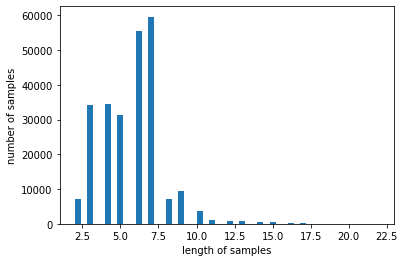

In [126]:
print('리뷰의 최대 길이 :',max(len(l) for l in data_X))
print('리뷰의 평균 길이 :',sum(map(len, data_X))/len(data_X))
plt.hist([len(s) for s in data_X], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [127]:
max_len = 22

In [128]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data_X)

In [129]:
X_data = tokenizer.texts_to_sequences(data_X)

In [130]:
X_data[:5]

[[843, 34, 14, 5],
 [5276, 1, 37, 5],
 [2394, 31, 33, 67, 10, 7],
 [2384, 41, 55, 16, 3, 11],
 [2971, 1, 60, 4]]

In [131]:
X_data = pad_sequences(X_data, maxlen = max_len)

In [132]:
X_data[:5]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,  843,   34,   14,    5],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0, 5276,    1,   37,    5],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0, 2394,   31,   33,   67,   10,    7],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0, 2384,   41,   55,   16,    3,   11],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0, 2971,    1,   60,    4]],
      dtype=int32)

##학습 데이터와 테스트 데이터 분리

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X_data, label_data, test_size=.2, random_state=777)

##원-핫 인코딩

In [134]:
y_train = to_categorical(y_train, num_classes=intent_label_size)
y_test = to_categorical(y_test, num_classes=intent_label_size)

In [135]:
y_train

array([[0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)

In [136]:
vocab_size = len(tokenizer.word_index) + 1

##의도 분류기 학습

In [137]:
import pickle
from keras.layers import Embedding, Dense, GRU
from keras.models import Sequential
from keras.models import load_model
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [138]:
model = Sequential()
model.add(Embedding(vocab_size, 128))
model.add(GRU(128))
model.add(Dense(intent_label_size, activation='softmax'))

In [139]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('skku_best_intent_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [140]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=5, callbacks=[es, mc], batch_size=32, validation_split=0.2)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 157884 samples, validate on 39472 samples
Epoch 1/5
157884/157884 [==============================] - 126s 796us/step - loss: 0.0098 - acc: 0.9969 - val_loss: 1.6427e-06 - val_acc: 1.0000

Epoch 00001: val_acc improved from -inf to 1.00000, saving model to skku_best_intent_model.h5
Epoch 2/5
157884/157884 [==============================] - 116s 737us/step - loss: 5.1410e-07 - acc: 1.0000 - val_loss: 2.2537e-07 - val_acc: 1.0000

Epoch 00002: val_acc did not improve from 1.00000
Epoch 3/5
157884/157884 [==============================] - 115s 731us/step - loss: 1.3491e-07 - acc: 1.0000 - val_loss: 5.2811e-07 - val_acc: 1.0000

Epoch 00003: val_acc did not improve from 1.00000
Epoch 4/5
157884/157884 [==============================] - 116s 732us/step - loss: 1.1988e-07 - acc: 1.0000 - val_loss: 1.7015e-07 - val_acc: 1.0000

Epoch 00004: val_acc did not improve from 1.00000
Epoch 5/5
15

##모델 저장 및 로드

In [143]:
loaded_model = load_model('skku_best_intent_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

49340/49340 [==============================] - 8s 157us/step

 테스트 정확도: 1.0000


##토크나이저 저장 및 로드

In [141]:
# saving
with open('skku_intent_tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [142]:
with open('skku_intent_tokenizer.pickle', 'rb') as handle:
    loaded_tokenizer = pickle.load(handle)

##테스트

In [144]:
def predict(new_sentence):
  new_sentence = mecab.morphs(new_sentence) # 토큰화
  encoded = loaded_tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
  pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
  y_predicted = loaded_model.predict(pad_new) # 예측
  y_predicted = np.argmax(y_predicted, axis=-1) # 원-핫 인코딩을 다시 정수 인코딩으로 변경함.
  return idx_label[y_predicted[0]]

In [145]:
predict('삼성전자랑 유사한 종목 알려줘')

'유사기업'

In [146]:
predict('유사종목 삼성전자')

'유사기업'

In [147]:
predict('삼전이랑 유사한 주식 알려줘')

'유사기업'

In [148]:
predict('삼전이랑 비슷한 주식 알려줘')

'유사기업'

In [149]:
predict('삼전이랑 유사한 거 알려줘')

'유사기업'

In [150]:
predict('반도체 관련 기업 알려줘')

'키워드'

In [151]:
predict('키워드 반도체')

'키워드'

In [152]:
predict('삼성전자 분석')

'사업개요'

In [153]:
predict('삼성전자 분석해봐라')

'사업개요'

In [154]:
predict('삼성전자 요약')

'사업개요'

In [155]:
predict('치킨 테마주 알려줘')

'키워드'

In [156]:
predict('GS리테일 개요')

'사업개요'

In [157]:
predict('GS리테일 가격 알려줘')

'가격'

In [158]:
predict('GS리테일 종가가 궁금해')

'가격'

In [159]:
predict('GS리테일 변화율이 너무 너무 궁금해')

'가격'

#개체명 인식 데이터 만들기

In [160]:
# 규칙을 정의한다.
# 키워드 -> KEYWORD
# 종목 이름 -> STOCK
# 가격 -> PRICE
# 나머지 -> O

##사업 개요 학습 데이터 만들기

In [161]:
print(stock_list)

['동화약품', 'KR모터스', '경방', '메리츠화재', '삼양홀딩스', '삼양홀딩스우', '하이트진로', '하이트진로2우B', '유한양행', '유한양행우', 'CJ대한통운', '하이트진로홀딩스', '하이트진로홀딩스우', '두산', '두산우', '두산2우B', '성창기업지주', '대림산업', '대림산업우', '유유제약', '유유제약1우', '유유제약2우B', '일동홀딩스', '한국테크놀로지그룹', '삼천당제약', '기아차', '대유플러스', '노루홀딩스', '노루홀딩스우', '한화손해보험', '삼화페인트', '롯데손해보험', '대원강업', '중앙에너비스', '조선내화', '대동공업', '가온전선', '삼일제약', '흥국화재', '흥국화재우', '흥국화재2우B', 'CS홀딩스', '동아쏘시오홀딩스', '천일고속', 'SK하이닉스', '영풍', 'LS네트웍스', '유수홀딩스', '현대건설', '현대건설우', '이화산업', '삼성화재', '삼성화재우', '화천기공', '강남제비스코', '한화', '한화우', '한화3우B', '보해양조', '유니온', '전방', '한국주철관', 'DB하이텍', 'DB하이텍1우', '신라섬유', '페이퍼코리아', 'CJ', 'CJ우', 'CJ4우(전환)', 'JW중외제약', 'JW중외제약우', 'JW중외제약2우B', '대한방직', '만호제강', 'LG상사', '대한제분', '국보', '유진투자증권', '금호전기', '동국제강', 'GS글로벌', '남광토건', '부국증권', '부국증권우', '상상인증권', '백광산업', '삼성제약', 'SG충방', 'KG케미칼', '태원물산', '세아베스틸', '대한전선', '현대해상', 'BYC', 'BYC우', '삼부토건', '현대차증권', 'SK증권', 'SK증권우', '동양', '동양우', '동양2우B', '동양3우B', 'DI동일', '안국약품', '조비', '제일연마', '금양', '케이비아이동국실업', '종근당홀딩스', '대상', '대상우', '신영증권', '신영증권우', 'SK네트웍스',

In [ ]:
# analysis_df

In [ ]:
tokenized_sequences = []
label_sequences = []
for sample in analysis_df['question'].to_list():
  temp_sample = []
  tokenized_sample = mecab.morphs(sample) # 토큰화
  for word in tokenized_sample:
    if word in analysis_not_stockname_list:
      temp_sample.append('O')
    else:
      if 'B-STOCK' in temp_sample:
        temp_sample.append('I-STOCK')
      else:
        temp_sample.append('B-STOCK')

    # 개요를 개, 요로 나누는 경우가 있음. 이 경우 레이블링 에러므로 조정 필요.
    # ex) 엠투아이 개요 -> ['엠투아이', '개', '요']
    # 조정하지 않으면 '개', '요'에 각각 'STOCK-I'가 들어감.
  if 'O' not in temp_sample:
    temp_sample[-1] = 'O'
    temp_sample[-2] = 'O'
    print('예기치 못한 레이블링 에러 발생으로 레이블 조정. 조정 결과 :', tokenized_sample, temp_sample)
      
  tokenized_sequences.append(tokenized_sample)
  label_sequences.append(temp_sample)

예기치 못한 레이블링 에러 발생으로 레이블 조정. 조정 결과 : ['GS리테일', '개', '요'] ['B-STOCK', 'O', 'O']
예기치 못한 레이블링 에러 발생으로 레이블 조정. 조정 결과 : ['사조동아원', '개', '요'] ['B-STOCK', 'O', 'O']
예기치 못한 레이블링 에러 발생으로 레이블 조정. 조정 결과 : ['E1', '개', '요'] ['B-STOCK', 'O', 'O']
예기치 못한 레이블링 에러 발생으로 레이블 조정. 조정 결과 : ['삼일', '개', '요'] ['B-STOCK', 'O', 'O']
예기치 못한 레이블링 에러 발생으로 레이블 조정. 조정 결과 : ['팍스넷', '개', '요'] ['B-STOCK', 'O', 'O']
예기치 못한 레이블링 에러 발생으로 레이블 조정. 조정 결과 : ['에스넷', '개', '요'] ['B-STOCK', 'O', 'O']
예기치 못한 레이블링 에러 발생으로 레이블 조정. 조정 결과 : ['케이엘넷', '개', '요'] ['B-STOCK', 'O', 'O']
예기치 못한 레이블링 에러 발생으로 레이블 조정. 조정 결과 : ['카페24', '개', '요'] ['B-STOCK', 'O', 'O']
예기치 못한 레이블링 에러 발생으로 레이블 조정. 조정 결과 : ['오공', '개', '요'] ['B-STOCK', 'O', 'O']
예기치 못한 레이블링 에러 발생으로 레이블 조정. 조정 결과 : ['예스24', '개', '요'] ['B-STOCK', 'O', 'O']
예기치 못한 레이블링 에러 발생으로 레이블 조정. 조정 결과 : ['YBM', '넷', '개', '요'] ['B-STOCK', 'I-STOCK', 'O', 'O']
예기치 못한 레이블링 에러 발생으로 레이블 조정. 조정 결과 : ['듀오백', '개', '요'] ['B-STOCK', 'O', 'O']
예기치 못한 레이블링 에러 발생으로 레이블 조정. 조정 결과 : ['플랜티넷', '개', '요'] ['B-STOCK', '

In [ ]:
analysis_df['question'].to_list()[10:15]

['동화약품 개요',
 '동화약품에 대해 개요를 알려줘봐',
 '동화약품의 사업 개요는 뭐야',
 '동화약품에 대해서 요약해줘',
 '동화약품 기업 개요를 알려줘']

In [ ]:
 tokenized_sequences[10:15]

[['동화약품', '개요'],
 ['동화약품', '에', '대해', '개요', '를', '알려줘', '봐'],
 ['동화약품', '의', '사업', '개요', '는', '뭐', '야'],
 ['동화약품', '에', '대해서', '요약', '해', '줘'],
 ['동화약품', '기업', '개요', '를', '알려줘']]

In [ ]:
label_sequences[10:15]

[['B-STOCK', 'O'],
 ['B-STOCK', 'O', 'O', 'O', 'O', 'O', 'O'],
 ['B-STOCK', 'O', 'O', 'O', 'O', 'O', 'O'],
 ['B-STOCK', 'O', 'O', 'O', 'O', 'O'],
 ['B-STOCK', 'O', 'O', 'O', 'O']]

In [ ]:
analysis_df['tokenized_sample'] = tokenized_sequences
analysis_df['ner_label'] = label_sequences

그 외 처리하지 못한 몇 가지 에러 샘플들 발견  
ex)  
[CJ제일제당, 우의, 개요, 는, 뭘까]  /  [STOCK-B, STOCK-I, O, O, O]  
[SK네트웍스, 우와, 비슷, 한, 종목, 분석]	[STOCK-B, STOCK-I, O, O, O, O]

In [ ]:
analysis_df.sample(50)

,question,intent,tokenized_sample,ner_label
39121,신진에스엠 요약해봐,사업개요,"[신진에스엠, 요약, 해, 봐]","[B-STOCK, O, O, O]"
41351,장원테크에 대해서 요약해줘,사업개요,"[장원테크, 에, 대해서, 요약, 해, 줘]","[B-STOCK, O, O, O, O, O]"
40734,스킨앤스킨의 사업 개요는 뭐야,사업개요,"[스킨앤스킨, 의, 사업, 개요, 는, 뭐, 야]","[B-STOCK, O, O, O, O, O, O]"
54268,이베스트스팩5호의 개요는 뭘까,사업개요,"[이베스트스팩5호, 의, 개요, 는, 뭘까]","[B-STOCK, O, O, O, O]"
740,중앙에너비스 기업 개요를 알려줘,사업개요,"[중앙에너비스, 기업, 개요, 를, 알려줘]","[B-STOCK, O, O, O, O]"
35866,한세실업 요약해봐,사업개요,"[한세실업, 요약, 해, 봐]","[B-STOCK, O, O, O]"
9539,한솔로지스틱스에 대해서 요약해줘,사업개요,"[한솔로지스틱스, 에, 대해서, 요약, 해, 줘]","[B-STOCK, O, O, O, O, O]"
33583,매커스에 대해 개요를 알려줘봐,사업개요,"[매커스, 에, 대해, 개요, 를, 알려줘, 봐]","[B-STOCK, O, O, O, O, O, O]"
35175,이엔드디에 대해서 요약해줘,사업개요,"[이엔드디, 에, 대해서, 요약, 해, 줘]","[B-STOCK, O, O, O, O, O]"
28724,하이스틸 기업 개요를 알려줘,사업개요,"[하이스틸, 기업, 개요, 를, 알려줘]","[B-STOCK, O, O, O, O]"


##키워드 검색 학습 데이터 만들기

In [ ]:
tokenized_sequences = []
label_sequences = []
for sample in keyword_df['question'].to_list():
  temp_sample = []
  tokenized_sample = mecab.morphs(sample) # 토큰화
  for word in tokenized_sample:
    if word in not_keyword_list:
      temp_sample.append('O')
    else:
      if 'B-KEYWORD' in temp_sample:
        temp_sample.append('I-KEYWORD')
      else:
        temp_sample.append('B-KEYWORD')
      
  tokenized_sequences.append(tokenized_sample)
  label_sequences.append(temp_sample)

In [ ]:
tokenized_sequences[10:15]

[['관련', '종목', '검색', '얍삽'],
 ['얍', '삽', '과', '관련', '있', '는', '주식', '검색'],
 ['얍', '삽', '와', '관계', '있', '는', '주식', '검색'],
 ['테마주', '검색', '얍삽'],
 ['관련주', '검색', '얍삽']]

In [ ]:
label_sequences[10:15]

[['O', 'O', 'O', 'B-KEYWORD'],
 ['B-KEYWORD', 'I-KEYWORD', 'O', 'O', 'O', 'O', 'O', 'O'],
 ['B-KEYWORD', 'I-KEYWORD', 'O', 'O', 'O', 'O', 'O', 'O'],
 ['O', 'O', 'B-KEYWORD'],
 ['O', 'O', 'B-KEYWORD']]

In [ ]:
keyword_df['tokenized_sample'] = tokenized_sequences
keyword_df['ner_label'] = label_sequences

잘못 레이블링이 된 경우 : [필기, 도, 구과, 관련, 있, 는, 주식, 검색]	[B-KEYWORD, I-KEYWORD, I-KEYWORD, O, O, O, O, O]

In [ ]:
keyword_df.sample(50)

,question,intent,tokenized_sample,ner_label
27590,만보 키워드 검색,키워드,"[만보, 키워드, 검색]","[B-KEYWORD, O, O]"
21666,이동도의 테마 종목이 뭐야,키워드,"[이동도, 의, 테마, 종목, 이, 뭐, 야]","[B-KEYWORD, O, O, O, O, O, O]"
56424,경화제 키워드 검색,키워드,"[경화제, 키워드, 검색]","[B-KEYWORD, O, O]"
16334,키워드 검색 가물,키워드,"[키워드, 검색, 가물]","[O, O, B-KEYWORD]"
38474,와트의 관련 종목이 궁금해,키워드,"[와트, 의, 관련, 종목, 이, 궁금, 해]","[B-KEYWORD, O, O, O, O, O, O]"
23196,빙초산 키워드 검색,키워드,"[빙초산, 키워드, 검색]","[B-KEYWORD, O, O]"
3133,테마주 검색 아르고,키워드,"[테마주, 검색, 아르고]","[O, O, B-KEYWORD]"
11039,키워드 분석 기리,키워드,"[키워드, 분석, 기리]","[O, O, B-KEYWORD]"
17798,관련주 검색 면면,키워드,"[관련주, 검색, 면면]","[O, O, B-KEYWORD]"
65435,잘대의 테마주 알려줘,키워드,"[잘대, 의, 테마주, 알려줘]","[B-KEYWORD, O, O, O]"


##유사 기업 학습 데이터 만들기

In [ ]:
tokenized_sequences = []
label_sequences = []
for sample in similarity_df['question'].to_list():
  temp_sample = []
  tokenized_sample = mecab.morphs(sample) # 토큰화
  for word in tokenized_sample:
    if word in similarity_not_stockname_list:
      temp_sample.append('O')
    else:
      if 'B-STOCK' in temp_sample:
        temp_sample.append('I-STOCK')
      else:
        temp_sample.append('B-STOCK')
      
  tokenized_sequences.append(tokenized_sample)
  label_sequences.append(temp_sample)

In [ ]:
tokenized_sequences[10:15]

[['동화약품', '과', '비슷', '한', '종목', '을', '알', '고', '싶', '어'],
 ['유사', '종목', '검색', '동화약품'],
 ['유사', '종목', '동화약품'],
 ['비슷', '한', '종목', '검색', '동화약품'],
 ['유사', '종목', '분석', '동화약품']]

In [ ]:
label_sequences[10:15]

[['B-STOCK', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'],
 ['O', 'O', 'O', 'B-STOCK'],
 ['O', 'O', 'B-STOCK'],
 ['O', 'O', 'O', 'O', 'B-STOCK'],
 ['O', 'O', 'O', 'B-STOCK']]

In [ ]:
similarity_df['tokenized_sample'] = tokenized_sequences
similarity_df['ner_label'] = label_sequences

In [ ]:
similarity_df.sample(50)

,question,intent,tokenized_sample,ner_label
21090,웹케시의 유사 종목 알려줘,유사기업,"[웹케시, 의, 유사, 종목, 알려줘]","[B-STOCK, O, O, O, O]"
43155,이노벡스 유사 종목 검색해줘,유사기업,"[이노벡스, 유사, 종목, 검색, 해, 줘]","[B-STOCK, O, O, O, O, O]"
7274,네이처셀과 유사 종목 분석,유사기업,"[네이처셀, 과, 유사, 종목, 분석]","[B-STOCK, O, O, O, O]"
3674,삼양식품의 비슷한 종목 알려줘,유사기업,"[삼양식품, 의, 비슷, 한, 종목, 알려줘]","[B-STOCK, O, O, O, O, O]"
26717,에프엔에스테크의 유사 종목은?,유사기업,"[에프엔에스테크, 의, 유사, 종목, 은, ?]","[B-STOCK, O, O, O, O, O]"
15066,삼성생명이랑 비슷한 주식을 알려줘,유사기업,"[삼성생명, 이랑, 비슷, 한, 주식, 을, 알려줘]","[B-STOCK, O, O, O, O, O, O]"
4782,비슷한 종목 검색 삼익THK,유사기업,"[비슷, 한, 종목, 검색, 삼익, THK]","[O, O, O, O, B-STOCK, I-STOCK]"
5653,국동과 비슷한 종목을 알고싶어,유사기업,"[국동, 과, 비슷, 한, 종목, 을, 알, 고, 싶, 어]","[B-STOCK, O, O, O, O, O, O, O, O, O]"
19700,엔피케이과 유사 종목 분석,유사기업,"[엔피케이, 과, 유사, 종목, 분석]","[B-STOCK, O, O, O, O]"
8470,한올바이오파마와 비슷한 종목 분석,유사기업,"[한올바이오파마, 와, 비슷, 한, 종목, 분석]","[B-STOCK, O, O, O, O, O]"


##가격 학습 데이터 만들기

In [ ]:
tokenized_sequences = []
label_sequences = []
for sample in price_df['question'].to_list():
  temp_sample = []
  tokenized_sample = mecab.morphs(sample) # 토큰화
  for word in tokenized_sample:
    if word in not_price_list:
      if word in {'가격', '종가', '저가', '고가', '시가', '시초가', '변화율', '변화', '율'}:
        # 변화율은 변화, 율로 쪼개질 수 있음.
        if 'B-PRICE' in temp_sample:
          temp_sample.append('I-PRICE')
        else:
          temp_sample.append('B-PRICE')
      else:
        temp_sample.append('O')
    else:
      if 'B-STOCK' in temp_sample:
        temp_sample.append('I-STOCK')
      else:
        temp_sample.append('B-STOCK')
      
  tokenized_sequences.append(tokenized_sample)
  label_sequences.append(temp_sample)

In [ ]:
tokenized_sequences[10:15]

[['동화약품', '는', '가격', '얼마', '야', '?'],
 ['동화약품', '은', '종가', '가', '얼마', '야', '?'],
 ['동화약품', '고가', '는', '?'],
 ['동화약품', '저가', '는', '?'],
 ['동화약품', '의', '가격', '은', '얼마', '일까', '?']]

In [ ]:
label_sequences[10:15]

[['B-STOCK', 'O', 'B-PRICE', 'O', 'O', 'O'],
 ['B-STOCK', 'O', 'B-PRICE', 'O', 'O', 'O', 'O'],
 ['B-STOCK', 'B-PRICE', 'O', 'O'],
 ['B-STOCK', 'B-PRICE', 'O', 'O'],
 ['B-STOCK', 'O', 'B-PRICE', 'O', 'O', 'O', 'O']]

In [ ]:
price_df['tokenized_sample'] = tokenized_sequences
price_df['ner_label'] = label_sequences

In [ ]:
ner_df = similarity_df.copy()
ner_df = ner_df.append(keyword_df).append(analysis_df).append(price_df)

In [ ]:
ner_df = shuffle(ner_df).reset_index(drop=True)

In [ ]:
ner_df[:50]

,question,intent,tokenized_sample,ner_label
0,키워드 검색 수런,키워드,"[키워드, 검색, 수런]","[O, O, B-KEYWORD]"
1,두산솔루스2우B 변화율이 궁금한데,가격,"[두산솔루스, 2, 우, B, 변화, 율, 이, 궁금, 한데]","[B-STOCK, I-STOCK, I-STOCK, I-STOCK, B-PRICE, ..."
2,시노펙스의 비슷한 종목 알려줘,유사기업,"[시노펙스, 의, 비슷, 한, 종목, 알려줘]","[B-STOCK, O, O, O, O, O]"
3,케이탑리츠 요약해봐,사업개요,"[케이탑리츠, 요약, 해, 봐]","[B-STOCK, O, O, O]"
4,홍조 관계주 검색,키워드,"[홍조, 관계주, 검색]","[B-KEYWORD, O, O]"
5,이지스280호 요약해주세요,사업개요,"[이지스280호, 요약, 해, 주, 세요]","[B-STOCK, O, O, O, O]"
6,라온피플 기업 개요를 말해봐,사업개요,"[라온피플, 기업, 개요, 를, 말, 해, 봐]","[B-STOCK, O, O, O, O, O, O]"
7,금양 분석,사업개요,"[금양, 분석]","[B-STOCK, O]"
8,키워드 검색 풋풋,키워드,"[키워드, 검색, 풋풋]","[O, O, B-KEYWORD]"
9,그린케미칼 분석해봐,사업개요,"[그린케미칼, 분석, 해, 봐]","[B-STOCK, O, O, O]"


In [ ]:
ner_df.to_csv('skku_total_data.csv', index=False)

In [ ]:
load_df = pd.read_csv('skku_total_data.csv')

In [ ]:
load_df.sample(50)

,question,intent,tokenized_sample,ner_label
16987,리노스은 종가가 얼마야?,가격,"['리노스', '은', '종가', '가', '얼마', '야', '?']","['B-STOCK', 'O', 'B-PRICE', 'O', 'O', 'O', 'O']"
71212,옐로페이의 유사 종목 알려줄래?,유사기업,"['옐로페이', '의', '유사', '종목', '알려', '줄래', '?']","['B-STOCK', 'O', 'O', 'O', 'O', 'O', 'O']"
95334,케틀과 관련있는 주식 검색,키워드,"['케틀', '과', '관련', '있', '는', '주식', '검색']","['B-KEYWORD', 'O', 'O', 'O', 'O', 'O', 'O']"
230354,죽부인 키워드 검색,키워드,"['죽부인', '키워드', '검색']","['B-KEYWORD', 'O', 'O']"
127582,위월드의 개요가 뭐야?,사업개요,"['위월드', '의', '개요', '가', '뭐', '야', '?']","['B-STOCK', 'O', 'O', 'O', 'O', 'O', 'O']"
238387,클리오 분석,사업개요,"['클리오', '분석']","['B-STOCK', 'O']"
132415,한국프랜지과 비슷한 종목을 알고싶어,유사기업,"['한국', '프랜', '지과', '비슷', '한', '종목', '을', '알', ...","['B-STOCK', 'I-STOCK', 'I-STOCK', 'O', 'O', 'O..."
216081,미원상사와 비슷 종목 검색해줘,유사기업,"['미원상사', '와', '비슷', '종목', '검색', '해', '줘']","['B-STOCK', 'O', 'O', 'O', 'O', 'O', 'O']"
59208,중구난방 관계주 검색,키워드,"['중구난방', '관계주', '검색']","['B-KEYWORD', 'O', 'O']"
192825,관련주 검색 핏물,키워드,"['관련주', '검색', '핏물']","['O', 'O', 'B-KEYWORD']"


In [ ]:
len(load_df)

243696

#개체명 인식 모델 학습

In [ ]:
# 데이터를 다시 로드했는데 리스트가 아니라 문자열로 인식될 때
# import ast
# ner_df['tokenized_sample'] = ner_df['tokenized_sample'].apply(ast.literal_eval)
# ner_df['ner_label'] = ner_df['ner_label'].apply(ast.literal_eval)

In [ ]:
ner_df['tokenized_sample'][3:4]

3    [케이탑리츠, 요약, 해, 봐]
Name: tokenized_sample, dtype: object

In [ ]:
ner_sentences = ner_df['tokenized_sample'].to_list()
ner_tags = ner_df['ner_label'].to_list()

In [ ]:
print(type(ner_sentences[0]))

<class 'list'>


샘플의 최대 길이 : 22
샘플의 평균 길이 : 5.629998


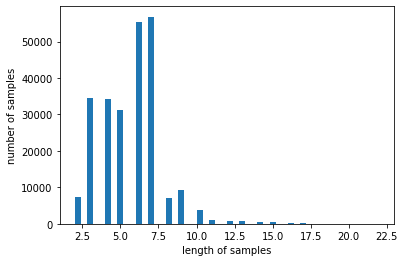

In [ ]:
print('샘플의 최대 길이 : %d' % max(len(l) for l in ner_sentences))
print('샘플의 평균 길이 : %f' % (sum(map(len, ner_sentences))/len(ner_sentences)))
plt.hist([len(s) for s in ner_sentences], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
src_tokenizer = Tokenizer(oov_token='OOV') # 모든 단어를 사용하지만 인덱스 1에는 단어 'OOV'를 할당한다.
src_tokenizer.fit_on_texts(ner_sentences)
tar_tokenizer = Tokenizer(lower=False) # 태깅 정보들은 내부적으로 대문자를 유지한채로 저장
tar_tokenizer.fit_on_texts(ner_tags)

In [ ]:
vocab_size = len(src_tokenizer.word_index) + 1
tag_size = len(tar_tokenizer.word_index) + 1
print('단어 집합의 크기 : {}'.format(vocab_size))
print('개체명 태깅 정보 집합의 크기 : {}'.format(tag_size))

단어 집합의 크기 : 7998
개체명 태깅 정보 집합의 크기 : 8


In [ ]:
print('단어 OOV의 인덱스 : {}'.format(src_tokenizer.word_index['OOV']))

단어 OOV의 인덱스 : 1


In [ ]:
X_data = src_tokenizer.texts_to_sequences(ner_sentences)
y_data = tar_tokenizer.texts_to_sequences(ner_tags)

In [ ]:
print(X_data[0])
print(y_data[0])

[25, 5, 2981]
[1, 1, 3]


In [ ]:
word_to_index = src_tokenizer.word_index
index_to_word = src_tokenizer.index_word
ner_to_index = tar_tokenizer.word_index
index_to_ner = tar_tokenizer.index_word
index_to_ner[0] = 'PAD'

In [ ]:
print(index_to_ner)

{1: 'O', 2: 'B-STOCK', 3: 'B-KEYWORD', 4: 'B-PRICE', 5: 'I-STOCK', 6: 'I-PRICE', 7: 'I-KEYWORD', 0: 'PAD'}


In [ ]:
decoded = []
for index in X_data[0] : # 첫번째 샘플 안의 인덱스들에 대해서
    decoded.append(index_to_word[index]) # 다시 단어로 변환

print('기존의 문장 : {}'.format(ner_sentences[0]))
print('디코딩 문장 : {}'.format(decoded))

기존의 문장 : ['키워드', '검색', '수런']
디코딩 문장 : ['키워드', '검색', '수런']


In [ ]:
max_len = 22
# 모든 샘플들의 길이를 맞출 때 뒤의 공간에 숫자 0으로 채움.
X_data = pad_sequences(X_data, padding='post', maxlen=max_len)
y_data = pad_sequences(y_data, padding='post', maxlen=max_len)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=.2, random_state=777)

In [ ]:
y_train = to_categorical(y_train, num_classes=tag_size)
y_test = to_categorical(y_test, num_classes=tag_size)

In [ ]:
print('훈련 샘플 문장의 크기 : {}'.format(X_train.shape))
print('훈련 샘플 레이블의 크기 : {}'.format(y_train.shape))
print('테스트 샘플 문장의 크기 : {}'.format(X_test.shape))
print('테스트 샘플 레이블의 크기 : {}'.format(y_test.shape))

훈련 샘플 문장의 크기 : (194956, 22)
훈련 샘플 레이블의 크기 : (194956, 22, 8)
테스트 샘플 문장의 크기 : (48740, 22)
테스트 샘플 레이블의 크기 : (48740, 22, 8)


In [ ]:
!pip install seqeval

     |████████████████████████████████| 51kB 5.3MB/s 
  Created wheel for seqeval: filename=seqeval-1.2.2-cp37-none-any.whl size=16172 sha256=e5a05d188ffdeb184b518375f10d892c22800c1a1de6d115194cc86e46dd73b6
  Stored in directory: /root/.cache/pip/wheels/52/df/1b/45d75646c37428f7e626214704a0e35bd3cfc32eda37e59e5f
Successfully built seqeval


In [ ]:
from keras.callbacks import Callback
from seqeval.metrics import f1_score, classification_report

In [ ]:
class F1score(Callback):
    def __init__(self, value = 0.0, use_char=True):
        super(F1score, self).__init__()
        self.value = value
        self.use_char = use_char

    def sequences_to_tags(self, sequences): # 예측값을 index_to_ner를 사용하여 태깅 정보로 변경하는 함수.
      result = []
      for sequence in sequences: # 전체 시퀀스로부터 시퀀스를 하나씩 꺼낸다.
          tag = []
          for pred in sequence: # 시퀀스로부터 예측값을 하나씩 꺼낸다.
              pred_index = np.argmax(pred) # 예를 들어 [0, 0, 1, 0 ,0]라면 1의 인덱스인 2를 리턴한다.
              tag.append(index_to_ner[pred_index].replace("PAD", "O")) # 'PAD'는 'O'로 변경
          result.append(tag)
      return result

    # 에포크가 끝날 때마다 실행되는 함수
    def on_epoch_end(self, epoch, logs={}):

      # char Embedding을 사용하는 경우
      if self.use_char:
        X_test = self.validation_data[0]
        X_char_test = self.validation_data[1]
        y_test = self.validation_data[2]
        y_predicted = self.model.predict([X_test, X_char_test])

      else:
        X_test = self.validation_data[0]
        y_test = self.validation_data[1]
        y_predicted = self.model.predict([X_test])

      pred_tags = self.sequences_to_tags(y_predicted)
      test_tags = self.sequences_to_tags(y_test)

      score = f1_score(pred_tags, test_tags)
      print(' - f1: {:04.2f}'.format(score * 100))
      print(classification_report(test_tags, pred_tags))

      # F1-score가 지금까지 중 가장 높은 경우
      if score > self.value:
        print('f1_score improved from %f to %f, saving model to best_model.h5'%(self.value, score))
        self.model.save('ner_crf_best_model.h5')
        self.value = score
      else:
        print('f1_score did not improve from %f'%(self.value))

In [ ]:
# saving
with open('ner_src_tokenizer.pickle', 'wb') as handle:
    pickle.dump(src_tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
# saving
with open('ner_tar_tokenizer.pickle', 'wb') as handle:
    pickle.dump(tar_tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Embedding, Dense, InputLayer, TimeDistributed, Dropout, Bidirectional
from keras.models import load_model
from keras_contrib.layers import CRF
from keras_contrib.losses import crf_loss
from keras_contrib.metrics import crf_viterbi_accuracy
from keras.optimizers import Adam
from keras.models import load_model

In [ ]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=64, input_length=max_len, mask_zero=True))
model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(TimeDistributed(Dense(50, activation="relu")))
crf = CRF(tag_size)
model.add(crf)

In [ ]:
model.compile(optimizer="adam", loss=crf.loss_function, metrics=[crf.accuracy])
history = model.fit(X_train, y_train, batch_size = 32, epochs = 10, validation_split = 0.2, verbose = 1, callbacks=[F1score(use_char=False)])

/usr/local/lib/python3.7/dist-packages/keras_contrib/layers/crf.py:346: UserWarning: CRF.loss_function is deprecated and it might be removed in the future. Please use losses.crf_loss instead.
  warnings.warn('CRF.loss_function is deprecated '
/usr/local/lib/python3.7/dist-packages/keras_contrib/layers/crf.py:353: UserWarning: CRF.accuracy is deprecated and it might be removed in the future. Please use metrics.crf_accuracy
  warnings.warn('CRF.accuracy is deprecated and it '


Train on 155964 samples, validate on 38992 samples
Epoch 1/10
155964/155964 [==============================] - 468s 3ms/step - loss: 7.3146 - crf_viterbi_accuracy: 0.9917 - val_loss: 7.2901 - val_crf_viterbi_accuracy: 0.9995
 - f1: 99.78
              precision    recall  f1-score   support

     KEYWORD       1.00      1.00      1.00     12470
       PRICE       1.00      1.00      1.00      9609
       STOCK       1.00      1.00      1.00     26632

   micro avg       1.00      1.00      1.00     48711
   macro avg       1.00      1.00      1.00     48711
weighted avg       1.00      1.00      1.00     48711

f1_score improved from 0.000000 to 0.997762, saving model to best_model.h5
Epoch 2/10
155964/155964 [==============================] - 465s 3ms/step - loss: 7.2877 - crf_viterbi_accuracy: 0.9996 - val_loss: 7.2896 - val_crf_viterbi_accuracy: 0.9999
 - f1: 99.93
              precision    recall  f1-score   support

     KEYWORD       1.00      1.00      1.00     12470
       PRI

KeyboardInterrupt: ignored

In [ ]:
bilstm_crf_model = load_model('ner_crf_best_model.h5', custom_objects={'CRF':CRF,
                                                  'crf_loss':crf_loss,
                                                  'crf_viterbi_accuracy':crf_viterbi_accuracy})

In [ ]:
i=1099 # 확인하고 싶은 테스트용 샘플의 인덱스.
print(X_test[i])
y_predicted = bilstm_crf_model.predict(np.array([X_test[i]])) # 입력한 테스트용 샘플에 대해서 예측 y를 리턴
y_predicted = np.argmax(y_predicted, axis=-1) # 원-핫 인코딩을 다시 정수 인코딩으로 변경함.
true = np.argmax(y_test[i], -1) # 원-핫 인코딩을 다시 정수 인코딩으로 변경함.
print(y_predicted[0])

print("{:15}|{:5}|{}".format("단어", "실제값", "예측값"))
print(35 * "-")

for w, t, pred in zip(X_test[i], true, y_predicted[0]):
    if w != 0: # PAD값은 제외함.
        print("{:17}: {:7} {}".format(index_to_word[w], index_to_ner[t], index_to_ner[pred]))

[1190   26   10   16   15    9   55    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]
[2 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
단어             |실제값  |예측값
-----------------------------------
라이트론             : B-STOCK B-STOCK
와                : O       O
유사               : O       O
한                : O       O
주식               : O       O
이                : O       O
모야               : O       O


In [ ]:
f1score = F1score()

y_predicted = bilstm_crf_model.predict([X_test])
pred_tags = f1score.sequences_to_tags(y_predicted)
test_tags = f1score.sequences_to_tags(y_test)

In [ ]:
print(classification_report(test_tags, pred_tags))

              precision    recall  f1-score   support

     KEYWORD       1.00      1.00      1.00     15707
       PRICE       1.00      1.00      1.00     11834
       STOCK       1.00      1.00      1.00     33158

   micro avg       1.00      1.00      1.00     60699
   macro avg       1.00      1.00      1.00     60699
weighted avg       1.00      1.00      1.00     60699



In [ ]:
print("F1-score: {:.1%}".format(f1_score(test_tags, pred_tags)))

F1-score: 100.0%


In [ ]:
def ner_prediction(new_sentence):
  new_sentence = mecab.morphs(new_sentence) # 토큰화
  encoded = src_tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
  pad_new = pad_sequences(encoded, maxlen = max_len, padding='post') # 패딩
  y_predicted = bilstm_crf_model.predict(np.array(pad_new)) # 입력한 테스트용 샘플에 대해서 예측 y를 리턴
  y_predicted = np.argmax(y_predicted, axis=-1) # 원-핫 인코딩을 다시 정수 인코딩으로 변경함.

  print("{:15}|{:5}".format("단어", "예측값"))
  print(35 * "-")

  for w, pred in zip(new_sentence, y_predicted[0]):
      if w != 0: # PAD값은 제외함.
          print("{:17}: {:7}".format(w, index_to_ner[pred]))

In [ ]:
ner_prediction('반도체 테마주 검색')

단어             |예측값  
-----------------------------------
반도체              : B-KEYWORD
테마주              : O      
검색               : O      


In [ ]:
ner_prediction('키워드 반도체')

단어             |예측값  
-----------------------------------
키워드              : O      
반도체              : B-KEYWORD


In [ ]:
ner_prediction('키워드 SK하이닉스')

단어             |예측값  
-----------------------------------
키워드              : O      
SK               : B-KEYWORD
하이닉스             : I-KEYWORD


In [ ]:
ner_prediction('키워드 검색 삼성전자')

단어             |예측값  
-----------------------------------
키워드              : O      
검색               : O      
삼성전자             : B-KEYWORD


In [ ]:
ner_prediction('삼성전자로 키워드 검색 부탁해')

단어             |예측값  
-----------------------------------
삼성전자             : B-KEYWORD
로                : O      
키워드              : O      
검색               : O      
부탁               : O      
해                : O      


In [ ]:
ner_prediction('사과 키워드 검색')

단어             |예측값  
-----------------------------------
사과               : B-KEYWORD
키워드              : O      
검색               : O      


In [ ]:
ner_prediction('노트북 키워드 검색해줘')

단어             |예측값  
-----------------------------------
노트북              : B-KEYWORD
키워드              : O      
검색               : O      
해                : O      
줘                : O      


In [ ]:
ner_prediction('코로나 테마주 알려줘')

단어             |예측값  
-----------------------------------
코로나              : B-KEYWORD
테마주              : O      
알려줘              : O      


In [ ]:
ner_prediction('삼성전자 사업 개요 알려줘')

단어             |예측값  
-----------------------------------
삼성전자             : B-STOCK
사업               : O      
개요               : O      
알려줘              : O      


In [ ]:
ner_prediction('대선 테마주 알려줘')

단어             |예측값  
-----------------------------------
대선               : B-KEYWORD
테마주              : O      
알려줘              : O      


In [ ]:
ner_prediction('메가스터디랑 유사한 주식 알려줘')

단어             |예측값  
-----------------------------------
메가스터디            : B-STOCK
랑                : O      
유사               : O      
한                : O      
주식               : O      
알려줘              : O      


In [ ]:
ner_prediction('SK바이오팜과 유사한 주식 알려줘')

단어             |예측값  
-----------------------------------
SK               : B-STOCK
바이오팜             : I-STOCK
과                : O      
유사               : O      
한                : O      
주식               : O      
알려줘              : O      


In [ ]:
ner_prediction('빅히트랑 관련된 주식 알려줘')

단어             |예측값  
-----------------------------------
빅히트              : B-KEYWORD
랑                : O      
관련               : O      
된                : O      
주식               : O      
알려줘              : O      


In [ ]:
ner_prediction('SK바이오팜이랑 관련된 주식 알려줘')

단어             |예측값  
-----------------------------------
SK               : B-KEYWORD
바이오팜             : I-KEYWORD
이랑               : O      
관련               : O      
된                : O      
주식               : O      
알려줘              : O      


'하고' 라는 표현이 포함된 데이터가 학습 데이터에 없었으므로 잘 인식하지 못한다.  
이는 데이터 추가를 통해 재학습을 해야한다.

In [ ]:
ner_prediction('화장품하고 관련된 주식 알려줘')

단어             |예측값  
-----------------------------------
화장품              : B-STOCK
하                : I-KEYWORD
고                : O      
관련               : O      
된                : O      
주식               : O      
알려줘              : O      


In [ ]:
ner_prediction('데이터분석과 연관된 주식 알려줘')

단어             |예측값  
-----------------------------------
데이터              : B-KEYWORD
분석               : O      
과                : O      
연관               : O      
된                : O      
주식               : O      
알려줘              : O      


In [ ]:
ner_prediction('마이크로서비스와 연관된 주식 알려줘')

단어             |예측값  
-----------------------------------
마이크로             : B-KEYWORD
서비스              : I-KEYWORD
와                : O      
연관               : O      
된                : O      
주식               : O      
알려줘              : O      


In [ ]:
ner_prediction('물통이랑 연관된 주식이 궁금하넹~')

단어             |예측값  
-----------------------------------
물통               : B-KEYWORD
이랑               : O      
연관               : O      
된                : O      
주식               : O      
이                : O      
궁금               : O      
하                : O      
넹                : O      
~                : O      


In [ ]:
ner_prediction('삼성전자 종가가 궁금해')

단어             |예측값  
-----------------------------------
삼성전자             : B-STOCK
종가               : B-PRICE
가                : O      
궁금               : O      
해                : O      


In [ ]:
ner_prediction('SK하이닉스의 시가가 궁금해')

단어             |예측값  
-----------------------------------
SK하이닉스           : B-STOCK
의                : O      
시가               : B-PRICE
가                : O      
궁금               : O      
해                : O      


In [ ]:
ner_prediction('SK바이오팜의 종가가 궁금해')

단어             |예측값  
-----------------------------------
SK               : B-STOCK
바이오팜             : I-STOCK
의                : O      
종가               : B-PRICE
가                : O      
궁금               : O      
해                : O      
